
Nome dos Integrantes:

Izabela Ramos Ferreira	    RM 352447

Kaique Vinicius Lima Soares	RM 351437

Walder Octacilio Garbellott	RM 352469

Análise Exploratória dos Dados (EDA)
dataset: https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

GITHUB: https://github.com/MissHead/cognitive-environments

streamlit: https://cognitive-environments-gkhnhw6cz9hvxzpdedkbgm.streamlit.app/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


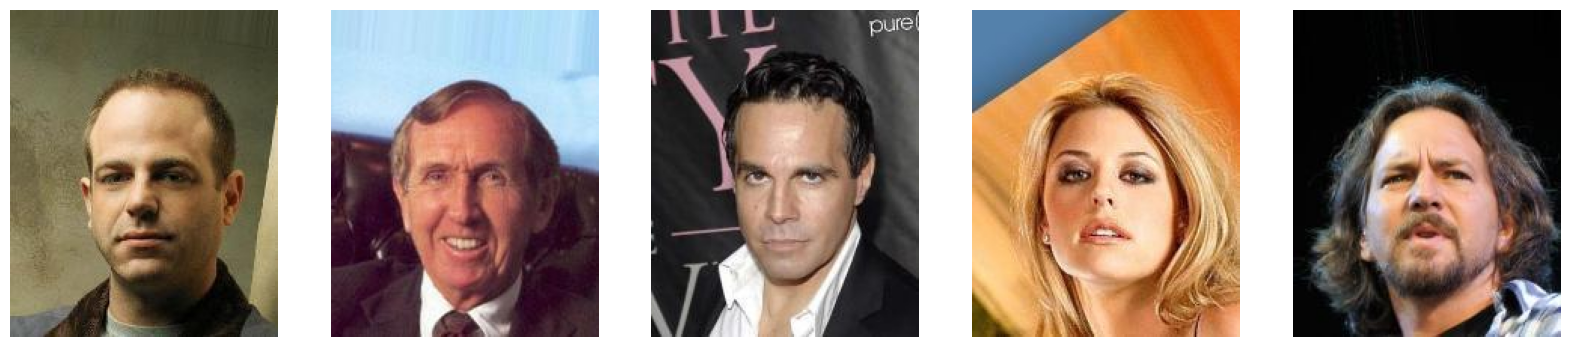

In [1]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
from PIL import Image

drive.mount('/content/drive')

image_dir = '/content/drive/My Drive/fiap'
images = os.listdir(image_dir)

# Exibir algumas imagens
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, img_file in enumerate(images[:5]):
    img = Image.open(os.path.join(image_dir, img_file))
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

Pré-processamento de Dados

	•	Redimensionar e normalizar as imagens.
	•	Dividir os dados em conjuntos de treino e teste.

In [2]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def load_images(image_dir, image_size=(128, 128)):
    images = []
    labels = []
    for img_file in os.listdir(image_dir):
        if ".jpg" in img_file:
            img = Image.open(os.path.join(image_dir, img_file)).resize(image_size)
            img_array = np.array(img)
            images.append(img_array)
            label = 1 if 'real' in img_file else 0
            labels.append(label)
    return np.array(images), np.array(labels)

image_dir = '/content/drive/My Drive/fiap'
images, labels = load_images(image_dir)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

# Salvar dados processados
processed_dir = 'data/processed'
os.makedirs(processed_dir, exist_ok=True)
np.save(os.path.join(processed_dir, 'X_train.npy'), X_train)
np.save(os.path.join(processed_dir, 'X_test.npy'), X_test)
np.save(os.path.join(processed_dir, 'y_train.npy'), y_train)
np.save(os.path.join(processed_dir, 'y_test.npy'), y_test)

Desenvolvimento do Modelo

- treinar e avaliar diferentes modelos.

Distribuição dos rótulos de treinamento: [1125]
Distribuição dos rótulos de teste: [375]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 932ms/step - accuracy: 0.9751 - loss: 0.0757 - val_accuracy: 1.0000 - val_loss: 2.2206e-35
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 864ms/step - accuracy: 1.0000 - loss: 4.5806e-33 - val_accuracy: 1.0000 - val_loss: 1.0067e-36
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 855ms/step - accuracy: 1.0000 - loss: 5.0261e-33 - val_accuracy: 1.0000 - val_loss: 9.1583e-37
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 858ms/step - accuracy: 1.0000 - loss: 2.3138e-33 - val_accuracy: 1.0000 - val_loss: 9.1356e-37
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 852ms/step - accuracy: 1.0000 - loss: 2.4854e-34 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 819ms/step - accuracy: 1.0000 - loss: 1.9739e-33 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 856ms/step - accuracy: 1.0000 - loss: 2.0464e-33 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 890

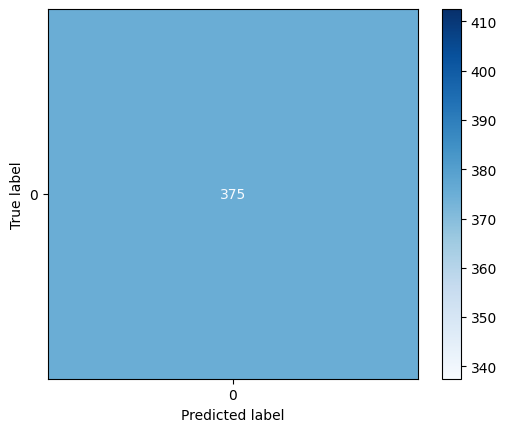

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Carregar dados processados
X_train = np.load('data/processed/X_train.npy')
X_test = np.load('data/processed/X_test.npy')
y_train = np.load('data/processed/y_train.npy')
y_test = np.load('data/processed/y_test.npy')

# Normalizar os dados
X_train, X_test = X_train / 255.0, X_test / 255.0

# Verificar os dados
print("Distribuição dos rótulos de treinamento:", np.bincount(y_train))
print("Distribuição dos rótulos de teste:", np.bincount(y_test))

# Definir o modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
unique_labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Salvar o modelo
model.save('content/models/model.h5')

Avaliação do Modelo

- F1 Score

In [4]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


F1 Score: 0.0


Conclusao

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image

model = load_model('content/models/model.h5')

def process_image(image_path, image_size=(128, 128)):
    img = Image.open(image_path).resize(image_size)
    img_array = np.array(img) / 255.0
    return img_array

new_image_path = '/content/drive/My Drive/fiap/000998.jpg'
new_image = process_image(new_image_path)
new_image = np.expand_dims(new_image, axis=0)

prediction = model.predict(new_image)
print(f'Prediction: {"Real" if prediction > 0.5 else "Fake"}')

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction: Fake


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 33s 871ms/step - accuracy: 1.0000 - loss: 8.8057e-34 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 862ms/step - accuracy: 1.0000 - loss: 1.2180e-33 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 32s 889ms/step - accuracy: 1.0000 - loss: 3.8838e-33 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 831ms/step - accuracy: 1.0000 - loss: 6.4486e-34 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 863ms/step - accuracy: 1.0000 - loss: 2.8586e-33 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 852ms/step - accuracy: 1.0000 - loss: 4.3569e-34 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 44s 946ms/step - accuracy: 1.0000 - loss: 7.0903e-33 - val_accuracy: 1.0000 - val_loss: 9.1354e-37
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s

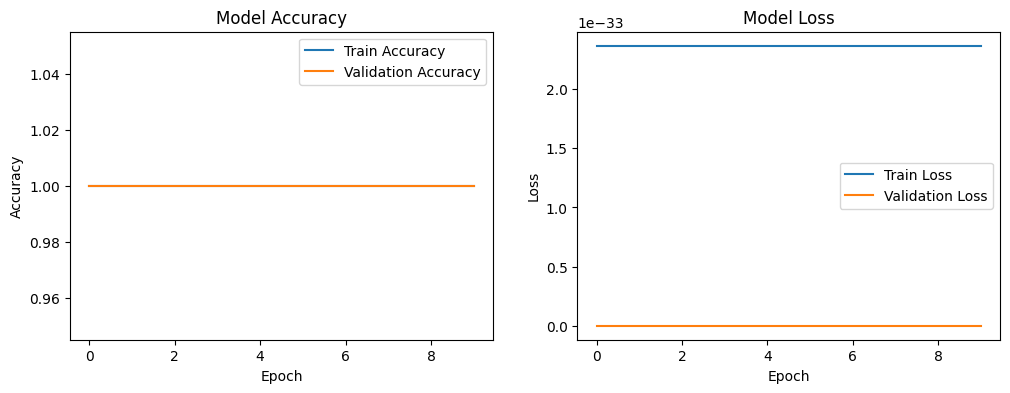

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step


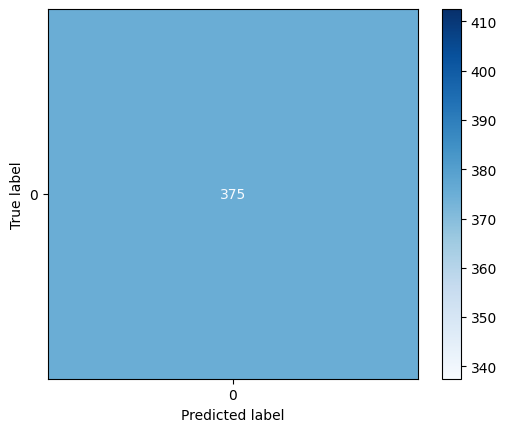

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

plot_training_history(history)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)

unique_labels = np.unique(y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

StreamLit App em execucao:

- Caso de Sucesso:

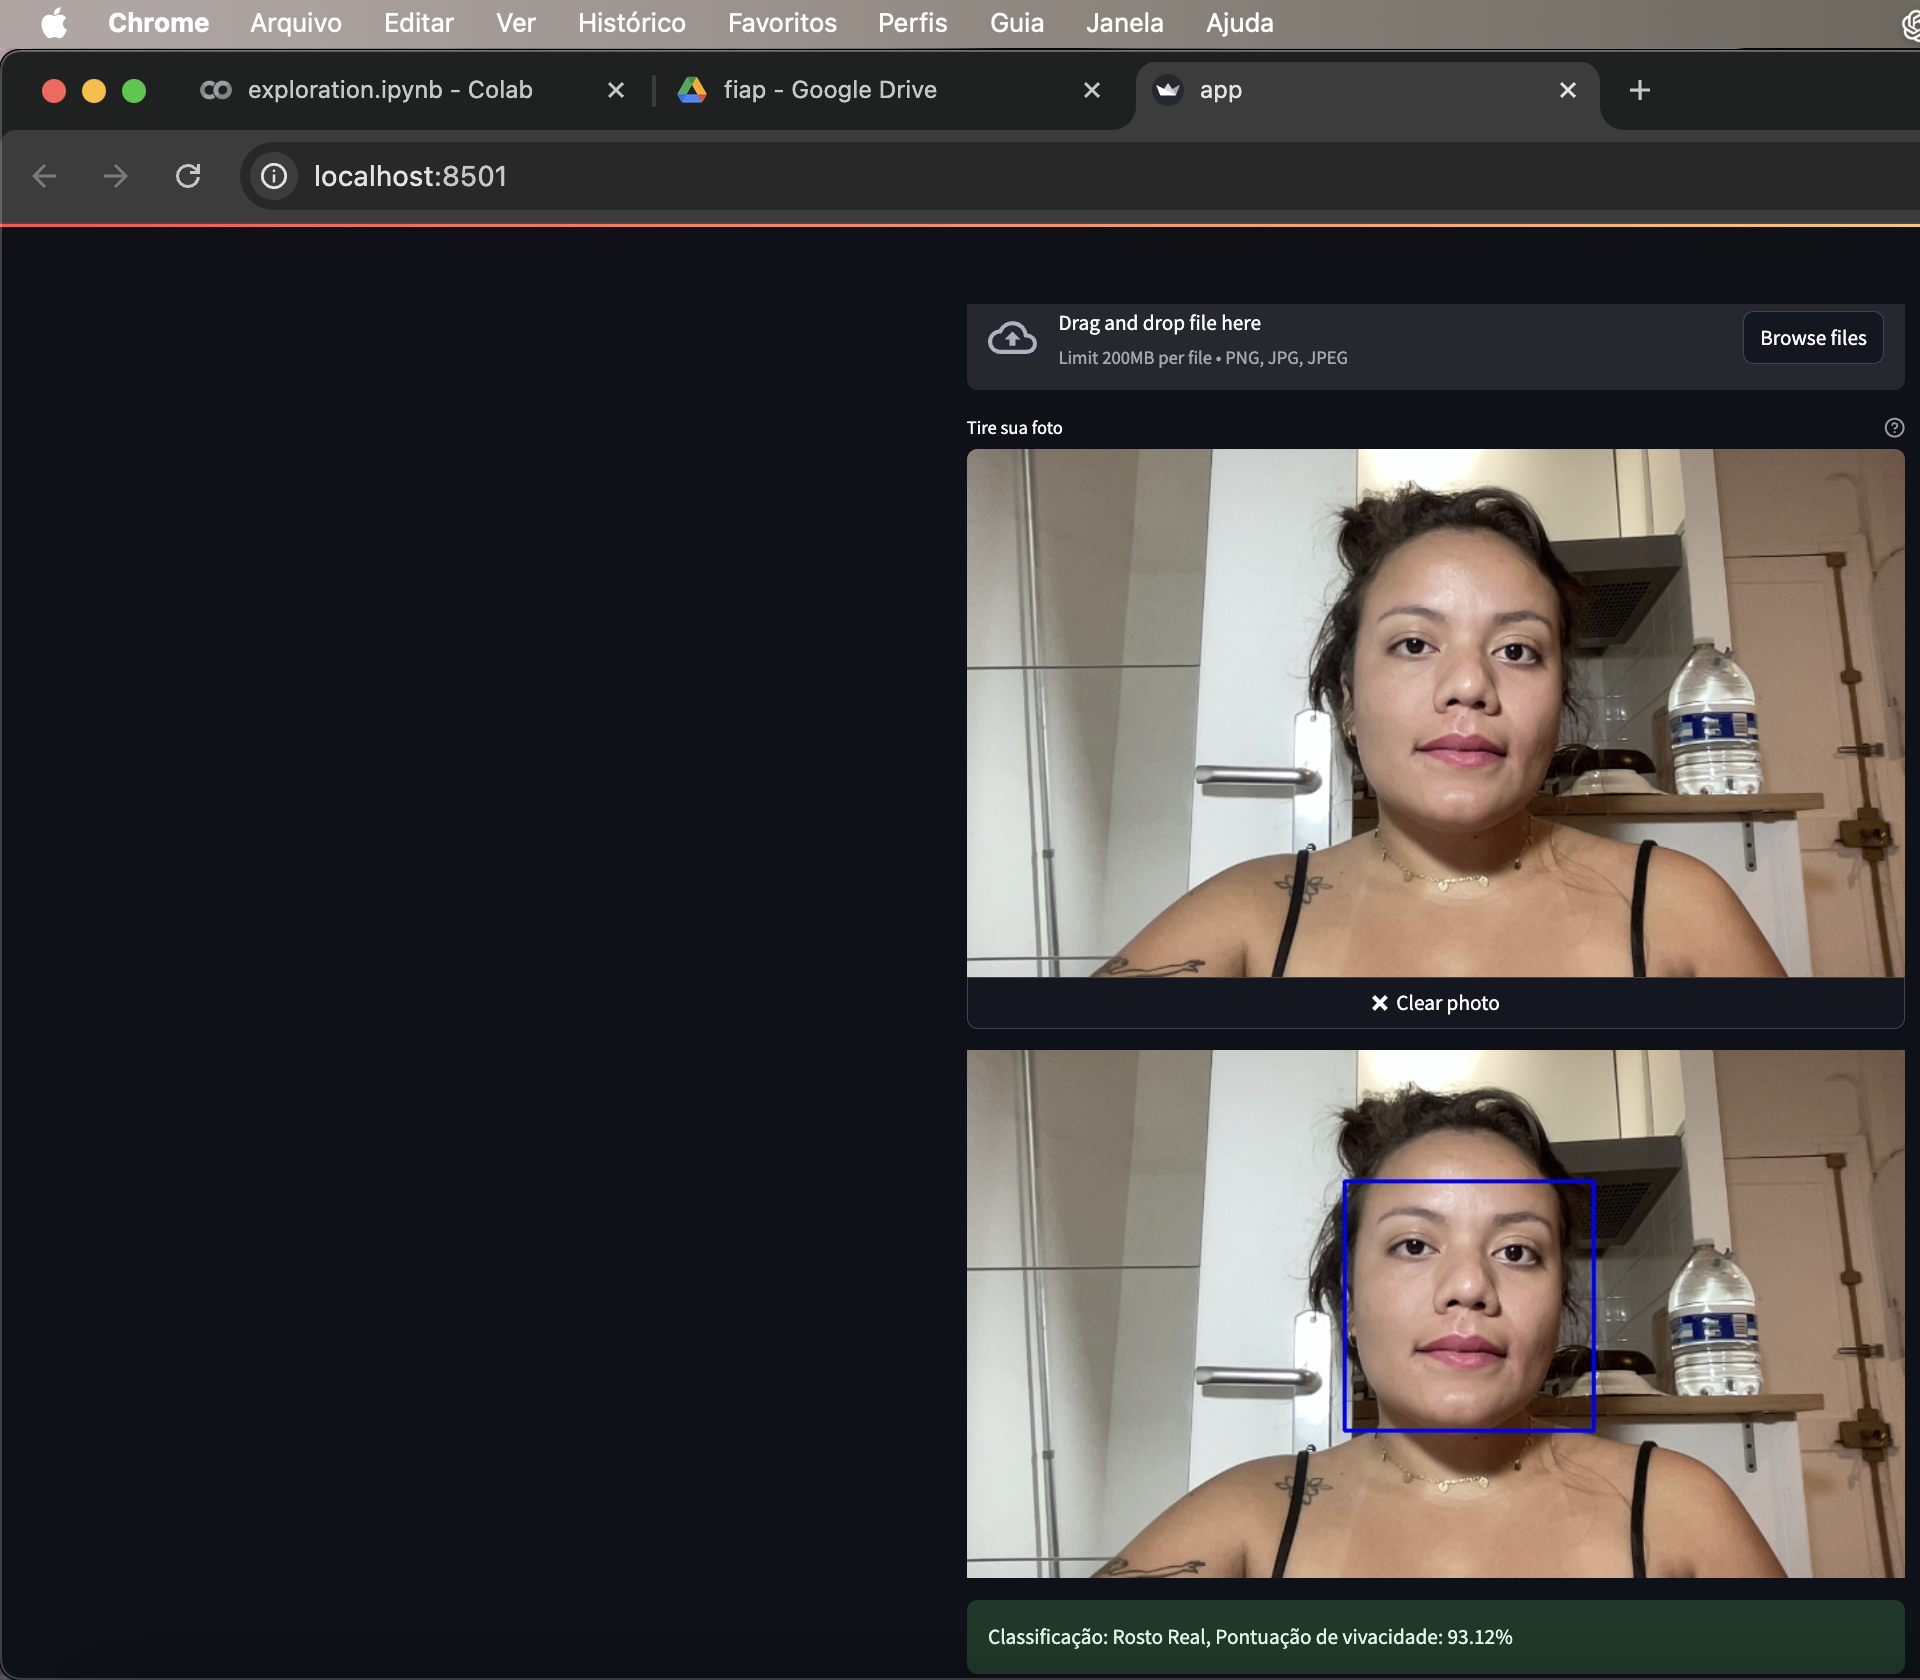

- Caso de Falha:



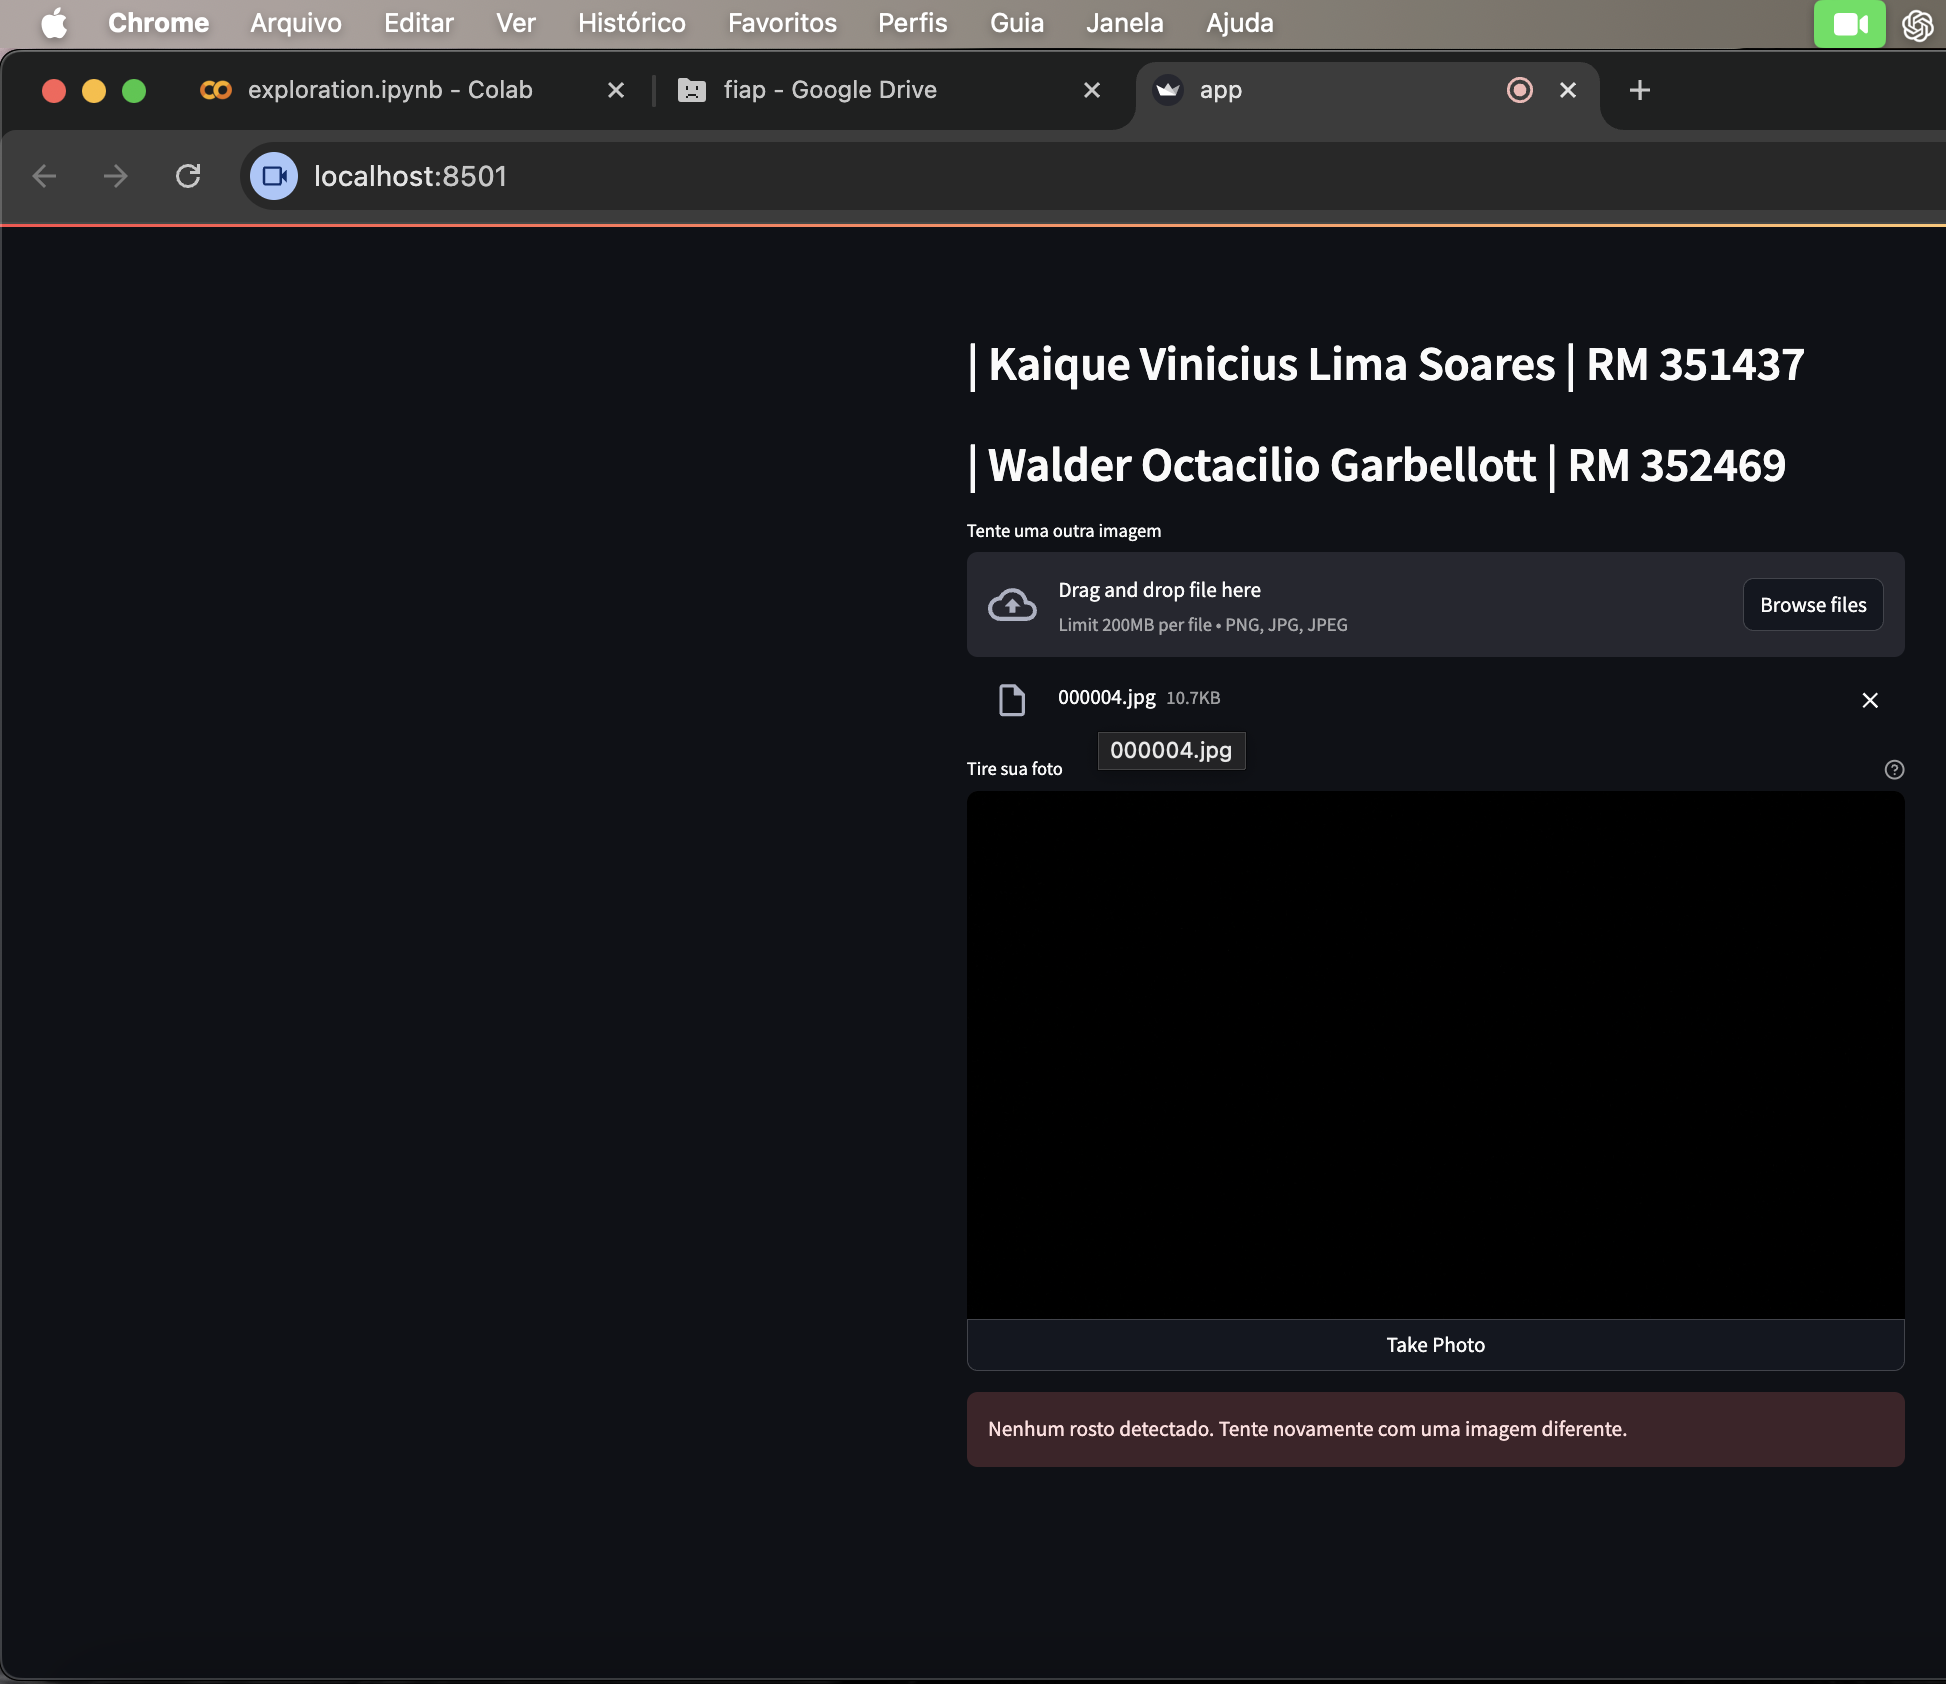

Imagem utilizada em caso de falha:
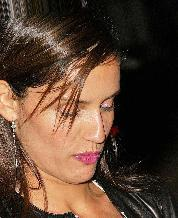